# Парсинг

In [ ]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup, SoupStrainer

**Tier 1 Tournament**

In [ ]:
url = "https://liquipedia.net/dota2/Tier_1_Tournaments"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs Send_pizza_to_FO-nTTaX All_glory_to_Liquipedia update-style" dir="ltr" lang="en" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<title>Tier 1 Tournaments - Liquipedia Dota 2 Wiki</title>
<script>document.documentElement.className="client-js Send_pizza_to_FO-nTTaX All_glory_to_Liquipedia update-style";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c68c7e2c824a6ec6b535dba0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tier_1_Tournaments","wgTitle":"Tier 1 Tournaments","wgCurRevisionId":1246040,"wgRevisionId":1246040,"wgArticleId":833,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Competiti

In [ ]:
tour_list = []
date_list = []
prize_list = []
num_par_list = []
location_list = []
first_list = []
second_list = []

tour_type = soup.find('h1',{'class':'firstHeading'}).text

for tour in soup.findAll("div",{'class':'divRow'}):
    tour_name = tour.find('b').text
    tour_list.append(tour_name)
    
    date = tour.find('div',{'class':'divCell EventDetails Date Header'}).text.strip()
    date_list.append(date)
    
    prize = tour.find('div',{'class':'divCell EventDetails Prize Header'}).text.strip()
    prize_list.append(prize)
    
    participants = tour.find('div',{'class':'divCell EventDetails PlayerNumber Header'}).text.strip()
    num_par_list.append(participants)
    
    location = tour.find('div',{'class':'divCell EventDetails Location Header'}).text.strip()
    location_list.append(location)
    
    first = tour.find('div',{'class':'divCell Placement FirstPlace'}).text.strip()
    first_list.append(first)
    
    second = tour.find('div',{'class':'divCell Placement SecondPlace'}).text.strip()
    second_list.append(second)

In [ ]:
# First tier tournament
tournament_df = pd.DataFrame({'Tournament_Name': tour_list,
                              'Date': date_list,
                              'Total_Prize':prize_list,
                              'Num_Participants': num_par_list,
                              'Location': location_list,
                              'First_Place': first_list,
                              'Second_Place': second_list})
tournament_df.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,The International 2022,"Oct 15 - 30, 2022","$13,274,304",20 teams,Singapore,TBD,TBD
1,ESL One Malaysia 2022,"Aug 23 - 28, 2022","$400,000",12 teams,"Genting Highlands, Malaysia",OG,Aster
2,PGL Arlington Major 2022,"Aug 04 - 14, 2022","$500,000",17 teams,"Arlington, United States",TSpirit,PSG.LGD
3,Riyadh Masters 2022,"Jul 20 - 24, 2022","$4,000,000",10 teams,"Riyadh, Saudi Arabia",PSG.LGD,TSpirit
4,ESL One Stockholm 2022,"May 12 - 22, 2022","$500,000",14 teams,"Stockholm, Sweden",OG,TSM


In [ ]:

tour_type = soup.find('h1',{'class':'firstHeading'}).text 
print(tour_type)

Tier 1 Tournaments


In [ ]:
tournament_df.to_csv("tire1_tournament.csv")

**Tire 2 Tournament**

In [ ]:
url = "https://liquipedia.net/dota2/Tier_2_Tournaments/2022"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs Send_pizza_to_FO-nTTaX All_glory_to_Liquipedia update-style" dir="ltr" lang="en" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<title>Tier 2 Tournaments: 2022 - Liquipedia Dota 2 Wiki</title>
<script>document.documentElement.className="client-js Send_pizza_to_FO-nTTaX All_glory_to_Liquipedia update-style";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b4691e4a4e632b3a7ba2d2b9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Tier_2_Tournaments/2022","wgTitle":"Tier 2 Tournaments/2022","wgCurRevisionId":1252718,"wgRevisionId":1252718,"wgArticleId":129338,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCate

In [ ]:
tour_list = []
date_list = []
prize_list = []
num_par_list = []
location_list = []
first_list = []
second_list = []

period_list = ["2022","2021-2020","2019-2018","2017-2016","2015-2014","Pre_2014"]

for period in period_list:
    url = f"https://liquipedia.net/dota2/Tier_2_Tournaments/{period}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    for tour in soup.findAll("div",{'class':'divRow'}):
        tour_name = tour.find('b').text
        tour_list.append(tour_name)

        date = tour.find('div',{'class':'divCell EventDetails Date Header'}).text.strip()
        date_list.append(date)

        prize = tour.find('div',{'class':'divCell EventDetails Prize Header'}).text.strip()
        prize_list.append(prize)

        participants = tour.find('div',{'class':'divCell EventDetails PlayerNumber Header'}).text.strip()
        num_par_list.append(participants)

        location = tour.find('div',{'class':'divCell EventDetails Location Header'}).text.strip()
        location_list.append(location)

        first = tour.find('div',{'class':'divCell Placement FirstPlace'}).text.strip()
        first_list.append(first)
        second = tour.find('div',{'class':'divCell Placement SecondPlace'}).text.strip()
        second_list.append(second)

In [ ]:
tournament_df2 = pd.DataFrame({'Tournament_Name': tour_list,
                              'Date': date_list,
                              'Total_Prize':prize_list,
                              'Num_Participants': num_par_list,
                              'Location': location_list,
                              'First_Place': first_list,
                              'Second_Place': second_list})
tournament_df2.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,BTS Pro Series Season 12: Southeast Asia,"Sep 21 - Oct 07, 2022","$40,000",9 teams,Southeast Asia,BOOM,XctN
1,GAMERS GALAXY: Invitational Series Thailand 2022,"Aug 18 - 20, 2022","$150,000",8 teams,"Hat Yai, Thailand",BOOM,Polaris
2,DPC SA 2021/2022 Tour 3: Division I,"Jun 09 - Jul 17, 2022","$205,000",8 teams,South America,TA,bc
3,DPC CN 2021/2022 Tour 3: Division I,"Jun 07 - Jul 17, 2022","$205,000",8 teams,China,RNG,Aster
4,DPC EEU 2021/2022 Tour 3: Division I,"Jun 09 - Jul 16, 2022","$205,000",8 teams,CIS,Otsd,NAVI


In [ ]:
tournament_df2.to_csv("tire2_tournament.csv")

https://www.kaggle.com/datasets/chanoncharuchinda/dota-2-tournaments?select=tier1_tournament.csv 

In [ ]:
#import pandas as pd 
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
t1 = pd.read_csv('/content/tire1_tournament.csv', index_col = 0)
t2 = pd.read_csv('/content/tire2_tournament.csv', index_col = 0)

In [ ]:
t1.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,The International 2022,"Oct 15 - 30, 2022","$13,274,304",20 teams,Singapore,TBD,TBD
1,ESL One Malaysia 2022,"Aug 23 - 28, 2022","$400,000",12 teams,"Genting Highlands, Malaysia",OG,Aster
2,PGL Arlington Major 2022,"Aug 04 - 14, 2022","$500,000",17 teams,"Arlington, United States",TSpirit,PSG.LGD
3,Riyadh Masters 2022,"Jul 20 - 24, 2022","$4,000,000",10 teams,"Riyadh, Saudi Arabia",PSG.LGD,TSpirit
4,ESL One Stockholm 2022,"May 12 - 22, 2022","$500,000",14 teams,"Stockholm, Sweden",OG,TSM


In [ ]:
t2.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place
0,BTS Pro Series Season 12: Southeast Asia,"Sep 21 - Oct 07, 2022","$40,000",9 teams,Southeast Asia,BOOM,XctN
1,GAMERS GALAXY: Invitational Series Thailand 2022,"Aug 18 - 20, 2022","$150,000",8 teams,"Hat Yai, Thailand",BOOM,Polaris
2,DPC SA 2021/2022 Tour 3: Division I,"Jun 09 - Jul 17, 2022","$205,000",8 teams,South America,TA,bc
3,DPC CN 2021/2022 Tour 3: Division I,"Jun 07 - Jul 17, 2022","$205,000",8 teams,China,RNG,Aster
4,DPC EEU 2021/2022 Tour 3: Division I,"Jun 09 - Jul 16, 2022","$205,000",8 teams,CIS,Otsd,NAVI


# Анализ команд Tier1

In [ ]:
len(t1['Tournament_Name'])

177

In [ ]:
len(t2['Tournament_Name'])

322

In [ ]:
t1['Date'].unique()

array(['Oct 15 - 30, 2022', 'Aug 23 - 28, 2022', 'Aug 04 - 14, 2022',
       'Jul 20 - 24, 2022', 'May 12 - 22, 2022', 'Mar 02 - 06, 2022',
       'Oct 07 - 17, 2021', 'Sep 06 - 10, 2021', 'Aug 21 - 29, 2021',
       'Jun 16 - 20, 2021', 'Jun 02 - 13, 2021', 'Mar 27 - Apr 04, 2021',
       'Dec 08 - 13, 2020', 'Oct 05 - Nov 01, 2020',
       'Aug 14 - Sep 06, 2020', 'Jun 20 - 28, 2020', 'May 02 - 10, 2020',
       'Mar 15 - 22, 2020', 'Jan 18 - 26, 2020', 'Dec 17 - 22, 2019',
       'Nov 16 - 24, 2019', 'Aug 15 - 25, 2019', 'Jun 22 - 30, 2019',
       'May 04 - 12, 2019', 'Mar 14 - 24, 2019', 'Mar 07 - 10, 2019',
       'Jan 19 - 27, 2019', 'Nov 09 - 18, 2018', 'Aug 15 - 25, 2018',
       'Jun 02 - 10, 2018', 'May 23 - 27, 2018', 'May 14 - 20, 2018',
       'Apr 27 - May 06, 2018', 'Mar 29 - Apr 07, 2018',
       'Mar 13 - 18, 2018', 'Mar 04 - 11, 2018', 'Feb 20 - 25, 2018',
       'Jan 19 - 21, 2018', 'Dec 01 - 03, 2017', 'Oct 26 - 29, 2017',
       'Aug 02 - 12, 2017', 'Jul 05 - 09, 

In [ ]:
t1['Year_Start'] = t1['Date'].apply(lambda y: y.split(", ")[1].split(" ")[0].strip())
t1['Year_End'] = t1['Date'].apply(lambda y: y.split(", ")[-1].strip())
t1.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Year_End
0,The International 2022,"Oct 15 - 30, 2022","$13,274,304",20 teams,Singapore,TBD,TBD,2022,2022
1,ESL One Malaysia 2022,"Aug 23 - 28, 2022","$400,000",12 teams,"Genting Highlands, Malaysia",OG,Aster,2022,2022
2,PGL Arlington Major 2022,"Aug 04 - 14, 2022","$500,000",17 teams,"Arlington, United States",TSpirit,PSG.LGD,2022,2022
3,Riyadh Masters 2022,"Jul 20 - 24, 2022","$4,000,000",10 teams,"Riyadh, Saudi Arabia",PSG.LGD,TSpirit,2022,2022
4,ESL One Stockholm 2022,"May 12 - 22, 2022","$500,000",14 teams,"Stockholm, Sweden",OG,TSM,2022,2022


In [ ]:
t1['Year_End'].value_counts()

2014    30
2013    28
2015    23
2016    20
2012    19
2017    16
2018    11
2019     8
2020     7
2022     6
2021     6
2011     3
Name: Year_End, dtype: int64

In [ ]:
# Tournaments that begin and end on different yea
t1[t1['Year_Start'] != t1['Year_End']]

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Year_End
83,Esportal Dota 2 League,"Nov 28, 2014 - Jul 05, 2015","$64,000",8 teams,Europe,VP,Empire,2014,2015
95,i-League Season 2,"Nov 17, 2014 - Jan 10, 2015","$129,307",8 teams,"Shanghai, China",LGD,HGT,2014,2015
121,G-League 2013,"Dec 09, 2013 - Jan 19, 2014","$44,640",10 teams,"Shanghai, China",DK,iG,2013,2014
122,StarLadder StarSeries Season 8,"Nov 25, 2013 - Jan 19, 2014","$124,000",18 teams,"Kyiv, Ukraine",Na`Vi,[A],2013,2014
123,Dota 2 Champions League Season 1,"Oct 17, 2013 - Jan 15, 2014","$50,000",10 teams,Europe,[A],SPG.int,2013,2014
126,2013 WPC ACE Dota 2 League,"Sep 22, 2013 - Jan 01, 2014","$248,024",10 teams,"Shanghai, China",DK,iG,2013,2014
150,RaidCall Dota 2 League Season 2,"Dec 12, 2012 - Apr 10, 2013","$10,000",12 teams,World,Liquid,Dignitas,2012,2013
152,The Defense Season 3,"Nov 26, 2012 - Mar 30, 2013","$20,000",32 teams,World,VP,Fnc.EU,2012,2013
153,G-League Season 2,"Dec 24, 2012 - Mar 09, 2013","$41,872",8 teams,"Shanghai, China",iG,LGD.int,2012,2013
154,The Premier League Season 3,"Oct 03, 2012 - Jan 13, 2013","$6,000",10 teams,Europe,Empire,VP,2012,2013


In [ ]:
t1['Total_Prize'] = t1['Total_Prize'].str.replace("$","").str.replace(",","")
t1['Total_Prize'] = t1['Total_Prize'].astype(int)
t1['Total_Prize'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    13274304
1      400000
2      500000
3     4000000
4      500000
Name: Total_Prize, dtype: int64

In [ ]:
t1['Num_Commands'] = t1['Num_Participants'].str.replace("teams","").str.replace(",","")
t1['Num_Commands'] = t1['Num_Commands'].astype(int)
t1['Num_Commands'].head()

0    20
1    12
2    17
3    10
4    14
Name: Num_Commands, dtype: int64

In [ ]:
t1['Year_End'] = t1['Year_End'].astype(int)

In [ ]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tournament_Name   177 non-null    object
 1   Date              177 non-null    object
 2   Total_Prize       177 non-null    int64 
 3   Num_Participants  177 non-null    object
 4   Location          177 non-null    object
 5   First_Place       177 non-null    object
 6   Second_Place      174 non-null    object
 7   Year_Start        177 non-null    object
 8   Year_End          177 non-null    int64 
 9   Num_Commands      177 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 15.2+ KB


In [ ]:
prize1 = t1.groupby(['Tournament_Name']).sum()
prize1.sort_values('Total_Prize', ascending=False)

,Total_Prize,Year_End,Num_Commands
Tournament_Name,,,
The International 2021,40018195,2021,18
The International 2019,34330068,2019,18
The International 2018,25532177,2018,18
The International 2017,24787916,2017,18
The International 2016,20770460,2016,16
...,...,...,...
RaidCall Dota 2 League Season 2,10000,2013,12
RaidCall Dota 2 League Season 3,10000,2013,8
The Premier League Season 4,10000,2013,10


In [ ]:
prize1['meanPrize'] = prize1['Total_Prize']/prize1['Num_Commands']

In [ ]:
prize1 = prize1.groupby(['Tournament_Name']).sum()
prize1.sort_values('meanPrize', ascending=False)

,Total_Prize,Year_End,Num_Commands,meanPrize
Tournament_Name,,,,
The International 2021,40018195,2021,18,2.223233e+06
The International 2019,34330068,2019,18,1.907226e+06
The International 2018,25532177,2018,18,1.418454e+06
The International 2017,24787916,2017,18,1.377106e+06
The International 2016,20770460,2016,16,1.298154e+06
...,...,...,...,...
The Premier League Season 2,10000,2012,12,8.333333e+02
The Defense Season 3,20000,2013,32,6.250000e+02
The Premier League Season 3,6000,2013,10,6.000000e+02


In [ ]:
prize1.describe()

,Total_Prize,Year_End,Num_Commands,meanPrize
count,1.770000e+02,177.000000,177.000000,1.770000e+02
mean,1.487808e+06,2015.423729,11.785311,9.368392e+04
std,5.243244e+06,2.744023,5.037271,2.952634e+05
min,6.000000e+03,2011.000000,4.000000,5.122500e+02
25%,5.000000e+04,2013.000000,8.000000,5.375750e+03
50%,2.082390e+05,2015.000000,10.000000,2.377025e+04
75%,5.000000e+05,2017.000000,16.000000,5.099975e+04
max,4.001820e+07,2022.000000,32.000000,2.223233e+06


In [ ]:
prize11 = prize1.groupby(['Year_End']).mean()
prize11

,Total_Prize,Num_Commands,meanPrize
Year_End,,,
2011,5.473333e+05,14.666667,34361.111111
2012,1.036802e+05,13.842105,6954.115169
2013,1.442221e+05,12.321429,10708.219891
2014,5.068026e+05,8.900000,37114.828087
2015,1.256252e+06,9.217391,89027.230616
2016,1.718101e+06,10.700000,116389.091667
2017,2.127486e+06,10.500000,136443.043403
2018,3.275652e+06,15.636364,193154.934343
2019,5.090008e+06,16.750000,287309.500000


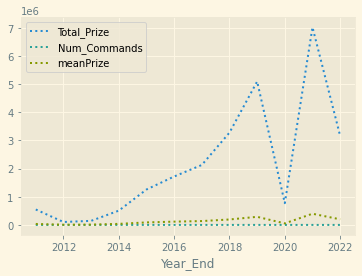

In [ ]:
prize11.plot()

In [ ]:
prize12 = prize11[['Num_Commands', 'meanPrize']]
prize12['meanPrize'] = prize12['meanPrize']/10000
prize12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Num_Commands,meanPrize
Year_End,,
2011,14.666667,3.436111
2012,13.842105,0.695412
2013,12.321429,1.070822
2014,8.900000,3.711483
2015,9.217391,8.902723
2016,10.700000,11.638909
2017,10.500000,13.644304
2018,15.636364,19.315493
2019,16.750000,28.730950


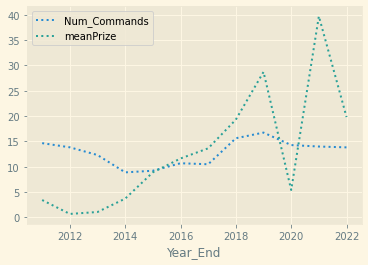

In [ ]:
prize12[['Num_Commands', 'meanPrize']].plot()

In [ ]:
t1.groupby(['Year_End']).count()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Num_Commands
Year_End,,,,,,,,,
2011,3,3,3,3,3,3,3,3,3
2012,19,19,19,19,19,19,19,19,19
2013,28,28,28,28,28,28,28,28,28
2014,30,30,30,30,30,30,30,30,30
2015,23,23,23,23,23,23,23,23,23
2016,20,20,20,20,20,20,20,20,20
2017,16,16,16,16,16,16,16,16,16
2018,11,11,11,11,11,11,11,11,11
2019,8,8,8,8,8,8,8,8,8


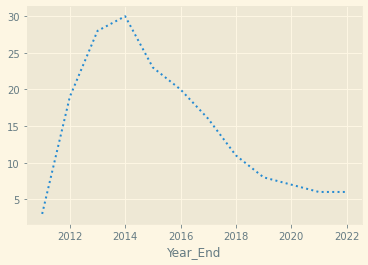

In [ ]:
t1count = t1.groupby(['Year_End']).count()
t1count['Tournament_Name'].plot()

In [ ]:
pd.DataFrame(t1count['Tournament_Name'])

,Tournament_Name
Year_End,
2011,3
2012,19
2013,28
2014,30
2015,23
2016,20
2017,16
2018,11
2019,8


In [ ]:
prize12['meanPrize']

Year_End
2011     3.436111
2012     0.695412
2013     1.070822
2014     3.711483
2015     8.902723
2016    11.638909
2017    13.644304
2018    19.315493
2019    28.730950
2020     5.416667
2021    39.721708
2022    19.823688
Name: meanPrize, dtype: float64

In [ ]:
t1all = pd.concat([t1count['Tournament_Name'],prize12['Num_Commands'], prize12['meanPrize']],axis=1)

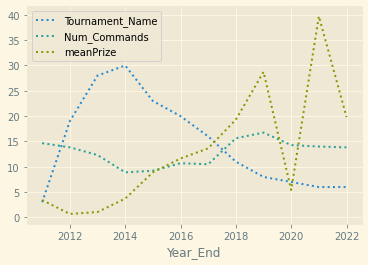

In [ ]:
t1all.plot()

# Анализ команд Tier2

In [ ]:
len(t2['Tournament_Name'])

322

In [ ]:
t2['Location'].unique()

array(['Southeast Asia', 'Hat Yai, Thailand', 'South America', 'China',
       'CIS', 'North America', 'Europe', 'Americas', 'Shanghai, China',
       'Europe\xa0&\xa0CIS', 'Asia', 'Asia\xa0&\xa0Shanghai, China',
       'North America\xa0&\xa0South America',
       'Birmingham, United Kingdom', 'Split, Croatia',
       'Los Angeles, United States', 'Kyiv, Ukraine', 'Bukovel, Ukraine',
       'Haikou, China', 'Moscow, Russia', 'Hamburg, Germany',
       'Rotterdam, Netherlands', 'World', "Xi'an, China", 'Mumbai, India',
       'Las Vegas, United States', 'Macau', 'Katowice, Poland',
       'Bangkok, Thailand', 'Bucharest, Romania', 'Stockholm, Sweden',
       'Singapore', 'Khon Kaen, Thailand', 'Jakarta, Indonesia',
       'Genting Highlands, Malaysia', 'Washington,  D.C., United States',
       'Kuala Lumpur, Malaysia', 'Shenzhen, China', 'Fuzhou, China',
       'Atlanta, United States', 'Lima, Peru', 'Jönköping, Sweden',
       'Brazil', 'Goyang, South Korea', 'São Paulo, Brazil',
   

In [ ]:
t2['Year_Start'] = t2['Date'].apply(lambda y: y.split(", ")[1].split(" ")[0].strip())
t2['Year_End'] = t2['Date'].apply(lambda y: y.split(", ")[-1].strip())
t2.head()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Year_End
0,BTS Pro Series Season 12: Southeast Asia,"Sep 21 - Oct 07, 2022","$40,000",9 teams,Southeast Asia,BOOM,XctN,2022,2022
1,GAMERS GALAXY: Invitational Series Thailand 2022,"Aug 18 - 20, 2022","$150,000",8 teams,"Hat Yai, Thailand",BOOM,Polaris,2022,2022
2,DPC SA 2021/2022 Tour 3: Division I,"Jun 09 - Jul 17, 2022","$205,000",8 teams,South America,TA,bc,2022,2022
3,DPC CN 2021/2022 Tour 3: Division I,"Jun 07 - Jul 17, 2022","$205,000",8 teams,China,RNG,Aster,2022,2022
4,DPC EEU 2021/2022 Tour 3: Division I,"Jun 09 - Jul 16, 2022","$205,000",8 teams,CIS,Otsd,NAVI,2022,2022


In [ ]:
t2['Year_End'].value_counts()

2020    61
2014    42
2022    32
2016    32
2021    24
2019    23
2013    22
2017    21
2015    20
2018    19
2012    14
2007     6
2006     3
2011     2
2008     1
Name: Year_End, dtype: int64

In [ ]:
# Tournaments that begin and end on different yea
t2[t2['Year_Start'] != t2['Year_End']]

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Year_End
26,DPC SA 2021/2022 Tour 1: Division I,"Dec 02, 2021 - Jan 23, 2022","$205,000",8 teams,South America,TP,INF.U,2021,2022
27,DPC EEU 2021/2022 Tour 1: Division I,"Dec 02, 2021 - Jan 23, 2022","$205,000",8 teams,CIS,TSpirit,PC,2021,2022
29,DPC SEA 2021/2022 Tour 1: Division I,"Dec 01, 2021 - Jan 22, 2022","$205,000",8 teams,Southeast Asia,BOOM,Fnatic,2021,2022
30,DPC WEU 2021/2022 Tour 1: Division I,"Nov 30, 2021 - Jan 21, 2022","$205,000",8 teams,Europe,Liquid,Tickles,2021,2022
31,DPC NA 2021/2022 Tour 1: Division I,"Nov 30, 2021 - Jan 20, 2022","$205,000",8 teams,North America,QC,UND,2021,2022
112,China Dota2 Professional League Season 1,"Oct 17, 2019 - Mar 29, 2020","$212,380",10 teams,China,PSG.LGD,VG,2019,2020
139,WePlay! Dota 2 Winter Madness,"Dec 27, 2018 - Jan 05, 2019","$100,000",14 teams,Europe & CIS,Gambit,OG,2018,2019
157,Dota2 Professional League Season 4 (2017 S2),"Sep 30, 2017 - Jan 21, 2018",NaN,23 teams,China,TBD,TBD,2017,2018
179,Russian Esports Cup 2016,"Apr 09, 2016 - Jan 22, 2017","$43,038",15 teams,"Moscow, Russia",F.3,cSc,2016,2017
210,Dota 2 Canada Cup - Season 6,"Nov 28, 2015 - Feb 08, 2016","$40,763",16 teams,North America,coL,E.Wolves,2015,2016


In [ ]:
t2 = t2.dropna()

In [ ]:
t2['Total_Prize'] = t2['Total_Prize'].str.replace("$","").str.replace(",","")
t2['Total_Prize'] = t2['Total_Prize'].astype(int)
t2['Total_Prize'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

0     40000
1    150000
2    205000
3    205000
4    205000
Name: Total_Prize, dtype: int64

In [ ]:
t2['Num_Commands'] = t2['Num_Participants'].str.replace("teams","").str.replace(",","")
t2['Num_Commands'] = t2['Num_Commands'].astype(int)
t2['Num_Commands'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    9
1    8
2    8
3    8
4    8
Name: Num_Commands, dtype: int64

In [ ]:
t2['Year_End'] = t2['Year_End'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 311
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tournament_Name   300 non-null    object
 1   Date              300 non-null    object
 2   Total_Prize       300 non-null    int64 
 3   Num_Participants  300 non-null    object
 4   Location          300 non-null    object
 5   First_Place       300 non-null    object
 6   Second_Place      300 non-null    object
 7   Year_Start        300 non-null    object
 8   Year_End          300 non-null    int64 
 9   Num_Commands      300 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 25.8+ KB


In [ ]:
prize2 = t2.groupby(['Tournament_Name']).sum()
prize2.sort_values('Total_Prize', ascending=False)

,Total_Prize,Year_End,Num_Commands
Tournament_Name,,,
Dota2 Professional League Season 2 - Top,700000,2016,10
ESL One Genting 2018,400000,2018,16
MDL Macau 2017,300000,2017,9
StarLadder i-League Invitational Season 3,300000,2017,8
StarLadder ImbaTV Invitational Season 5,300000,2018,8
...,...,...,...
Sina Cup Supernova Dota 2 Open Season 1,4548,2013,8
Razer Dota 2 Tournament,4000,2012,14
GosuLeague Season 2,3500,2012,24


In [ ]:
prize2['meanPrize'] = prize2['Total_Prize']/prize2['Num_Commands']

In [ ]:
prize2 = prize2.groupby(['Tournament_Name']).sum()
prize2.sort_values('meanPrize', ascending=False)

,Total_Prize,Year_End,Num_Commands,meanPrize
Tournament_Name,,,,
Dota2 Professional League Season 2 - Top,700000,2016,10,70000.000000
China Top 2016,229904,2016,4,57476.000000
MegaFon Winter Clash,300000,2018,6,50000.000000
National Electronic Arena 2016,195351,2016,4,48837.750000
DreamLeague Season 6,185000,2016,4,46250.000000
...,...,...,...,...
AMD Premier League Season 1,5000,2013,20,250.000000
GosuLeague Season 3,5000,2012,24,208.333333
Gigabyte Dota 2 Masters,5000,2012,24,208.333333


In [ ]:
prize2.describe()

,Total_Prize,Year_End,Num_Commands,meanPrize
count,300.000000,300.000000,300.000000,300.000000
mean,110101.116667,2017.520000,9.666667,13676.814112
std,97839.683857,3.119086,4.824917,12562.372813
min,1500.000000,2011.000000,4.000000,145.833333
25%,40000.000000,2015.000000,8.000000,3750.000000
50%,80000.000000,2018.000000,8.000000,9045.454545
75%,185064.000000,2020.000000,10.250000,25000.000000
max,700000.000000,2022.000000,36.000000,70000.000000


In [ ]:
prize21 = prize2.groupby(['Year_End']).mean()
prize21

,Total_Prize,Num_Commands,meanPrize
Year_End,,,
2011,12199.000000,8.000000,1524.875000
2012,5117.833333,14.416667,518.532077
2013,12625.454545,12.045455,1459.632102
2014,30099.081081,9.054054,4132.739554
2015,74552.368421,11.315789,8355.108187
2016,105644.843750,10.500000,13773.782306
2017,148252.500000,9.900000,18973.418494
2018,230304.000000,10.388889,26122.727445
2019,194470.043478,8.478261,23927.285455


In [ ]:
import matplotlib.pyplot as plt


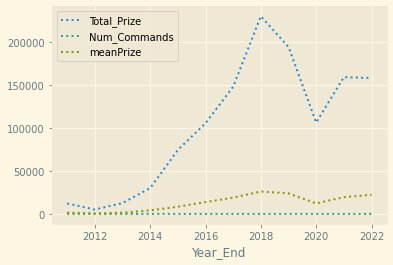

In [ ]:
prize21.plot()

In [ ]:
prize22 = prize21[['Num_Commands', 'meanPrize']]
prize22['meanPrize'] = prize22['meanPrize']/10000
prize22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Num_Commands,meanPrize
Year_End,,
2011,8.000000,0.152487
2012,14.416667,0.051853
2013,12.045455,0.145963
2014,9.054054,0.413274
2015,11.315789,0.835511
2016,10.500000,1.377378
2017,9.900000,1.897342
2018,10.388889,2.612273
2019,8.478261,2.392729


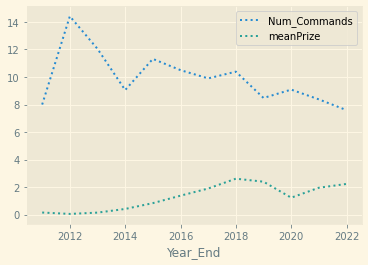

In [ ]:
prize22[['Num_Commands', 'meanPrize']].plot()

In [ ]:
t2.groupby(['Year_End']).count()

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Num_Commands
Year_End,,,,,,,,,
2011,2,2,2,2,2,2,2,2,2
2012,12,12,12,12,12,12,12,12,12
2013,22,22,22,22,22,22,22,22,22
2014,37,37,37,37,37,37,37,37,37
2015,19,19,19,19,19,19,19,19,19
2016,32,32,32,32,32,32,32,32,32
2017,20,20,20,20,20,20,20,20,20
2018,18,18,18,18,18,18,18,18,18
2019,23,23,23,23,23,23,23,23,23


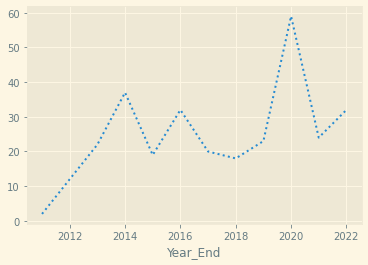

In [ ]:
t2count = t2.groupby(['Year_End']).count()
t2count['Tournament_Name'].plot()

In [ ]:
pd.DataFrame(t2count['Tournament_Name'])

,Tournament_Name
Year_End,
2011,2
2012,12
2013,22
2014,37
2015,19
2016,32
2017,20
2018,18
2019,23


In [ ]:
prize22['meanPrize']

Year_End
2011    0.152487
2012    0.051853
2013    0.145963
2014    0.413274
2015    0.835511
2016    1.377378
2017    1.897342
2018    2.612273
2019    2.392729
2020    1.231163
2021    1.953657
2022    2.231162
Name: meanPrize, dtype: float64

In [ ]:
t2all = pd.concat([t2count['Tournament_Name'],prize22['Num_Commands'], prize22['meanPrize']],axis=1)

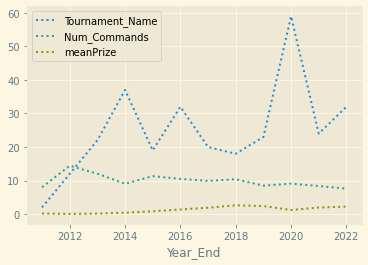

In [ ]:
t2all.plot()

# Визуализация команд Tier1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
t1count

,Tournament_Name,Date,Total_Prize,Num_Participants,Location,First_Place,Second_Place,Year_Start,Num_Commands
Year_End,,,,,,,,,
2011,3,3,3,3,3,3,3,3,3
2012,19,19,19,19,19,19,19,19,19
2013,28,28,28,28,28,28,28,28,28
2014,30,30,30,30,30,30,30,30,30
2015,23,23,23,23,23,23,23,23,23
2016,20,20,20,20,20,20,20,20,20
2017,16,16,16,16,16,16,16,16,16
2018,11,11,11,11,11,11,11,11,11
2019,8,8,8,8,8,8,8,8,8


In [ ]:
prize1.columns

Index(['Total_Prize', 'Year_End', 'Num_Commands', 'meanPrize'], dtype='object')

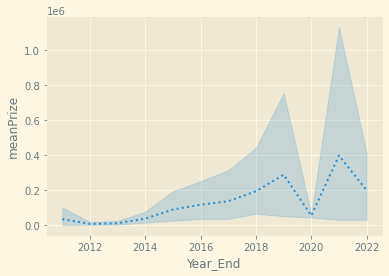

In [ ]:
sns.lineplot(data=prize1, x="Year_End", y="meanPrize")

In [ ]:
t1all.reset_index(level=0, inplace=True)

In [ ]:
X = t1all['Year_End']
y = t1all['meanPrize']
z = t1all['Num_Commands']
p = t1all['Tournament_Name']

In [ ]:
X.astype('int32').dtypes

dtype('int32')

In [ ]:
 print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


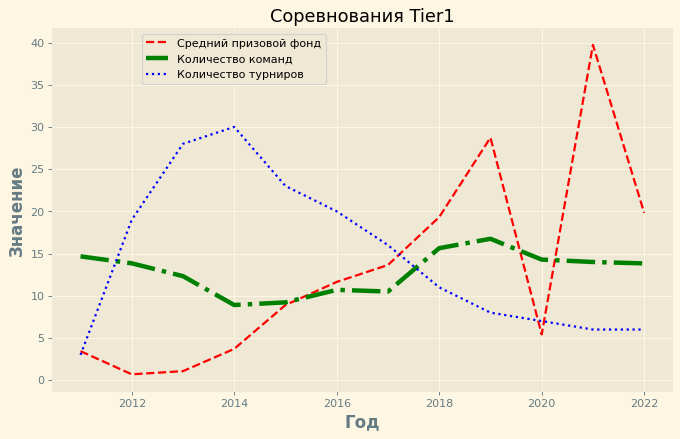

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10, 6), dpi=80)
# Plotting both the curves simultaneously
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(X, y, color='r', label='Средний призовой фонд')
mpl.rcParams['lines.linestyle'] = '-.'
plt.plot(X, z, color='g', linewidth=4, label='Количество команд')
mpl.rcParams['lines.linestyle'] = ':'
plt.plot(X, p, color='b', label='Количество турниров')  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Год", fontweight ='bold', fontsize = 15)
plt.ylabel("Значение", fontweight ='bold', fontsize = 15)
plt.title("Соревнования Tier1")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(bbox_to_anchor=(0.0, 0.5, 0.45, 0.5))
  
# To load the display window
plt.show()

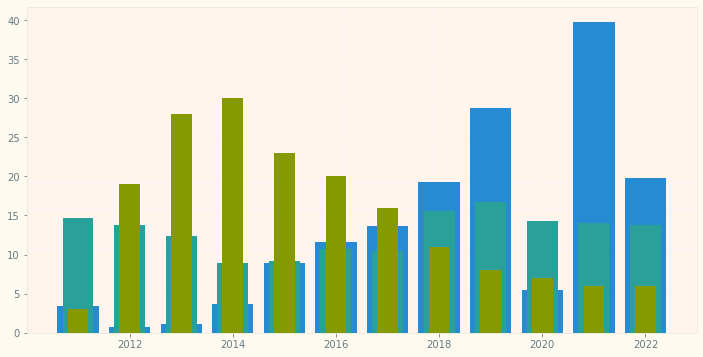

In [ ]:
fig, ax = plt.subplots()

ax.bar(X, y, width = 0.8)
ax.bar(X, z, width = 0.6)
ax.bar(X, p, width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

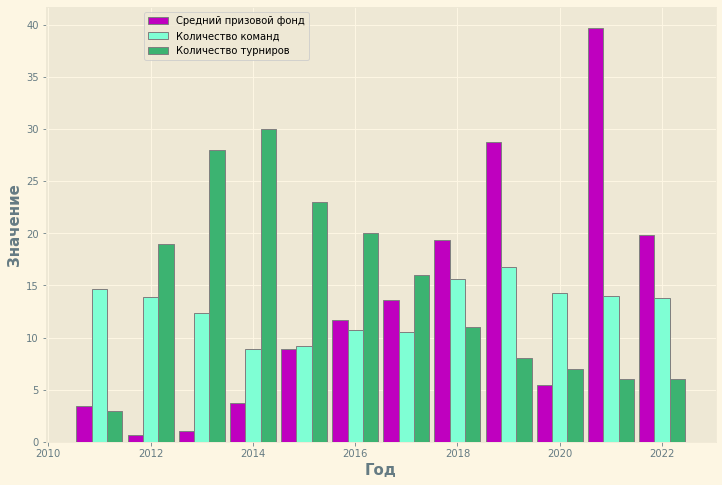

In [ ]:
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 

 
# Make the plot
plt.bar(X-0.3, y, color ='m', width = barWidth,
        edgecolor ='grey', label ='Средний призовой фонд')
plt.bar(X, z, color ='aquamarine', width = barWidth,
        edgecolor ='grey', label ='Количество команд')
plt.bar(X+0.3, p, color ='mediumseagreen', width = barWidth,
        edgecolor ='grey', label ='Количество турниров')
 
# Adding Xticks
plt.xlabel('Год', fontweight ='bold', fontsize = 15)
plt.ylabel('Значение', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len(IT))],['2015', '2016', '2017', '2018', '2019'])
 
plt.legend(bbox_to_anchor=(0.0, 0.5, 0.40, 0.5))
plt.show()

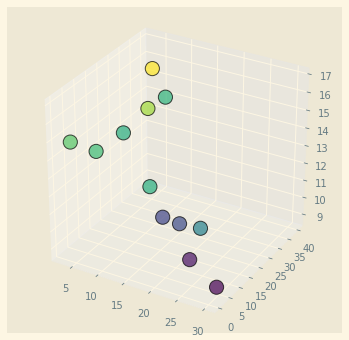

In [ ]:
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

# Визуализация команд Tier2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
prize2.columns

Index(['Total_Prize', 'Year_End', 'Num_Commands', 'meanPrize'], dtype='object')

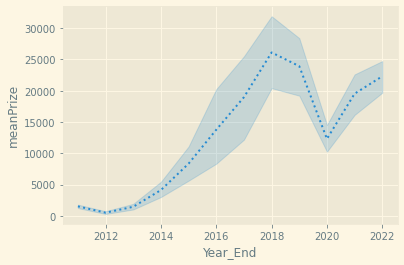

In [ ]:
sns.lineplot(data=prize2, x="Year_End", y="meanPrize")

In [ ]:
t2all.reset_index(level=0, inplace=True)

In [ ]:
X = t2all['Year_End']
y = t2all['meanPrize']
z = t2all['Num_Commands']
p = t2all['Tournament_Name']

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


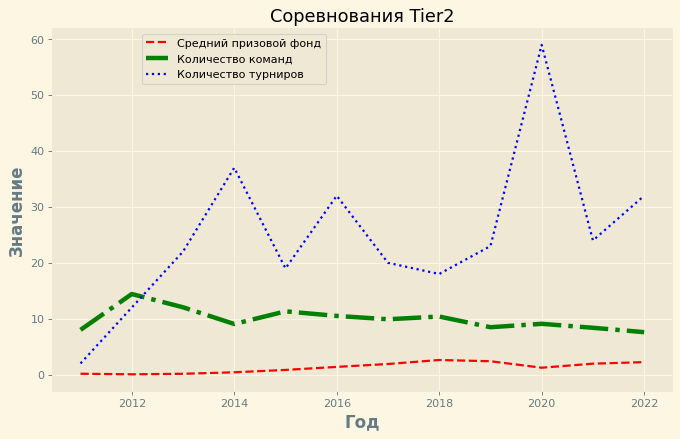

In [ ]:
#plt.style.use('Solarize_Light2')

plt.figure(figsize=(10, 6), dpi=80)
# Plotting both the curves simultaneously
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(X, y, color='r', label='Средний призовой фонд')
mpl.rcParams['lines.linestyle'] = '-.'
plt.plot(X, z, color='g', linewidth=4, label='Количество команд')
mpl.rcParams['lines.linestyle'] = ':'
plt.plot(X, p, color='b', label='Количество турниров')  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Год", fontweight ='bold', fontsize = 15)
plt.ylabel("Значение", fontweight ='bold', fontsize = 15)
plt.title("Соревнования Tier2")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(bbox_to_anchor=(0.0, 0.5, 0.45, 0.5))
  
# To load the display window
plt.show()

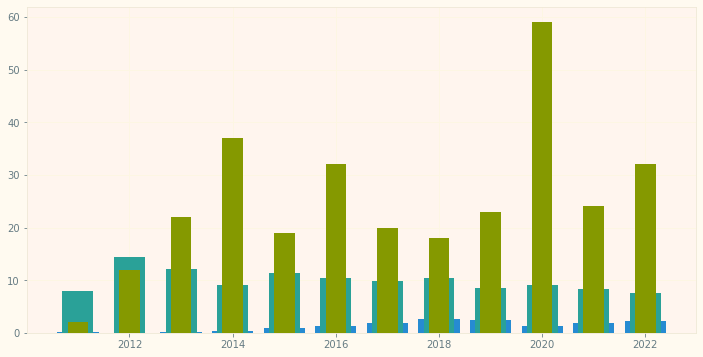

In [ ]:
fig, ax = plt.subplots()

ax.bar(X, y, width = 0.8)
ax.bar(X, z, width = 0.6)
ax.bar(X, p, width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

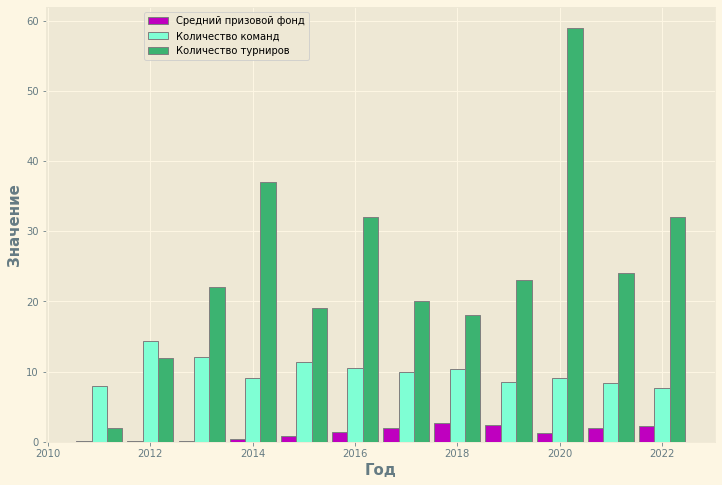

In [ ]:
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 

 
# Make the plot
plt.bar(X-0.3, y, color ='m', width = barWidth,
        edgecolor ='grey', label ='Средний призовой фонд')
plt.bar(X, z, color ='aquamarine', width = barWidth,
        edgecolor ='grey', label ='Количество команд')
plt.bar(X+0.3, p, color ='mediumseagreen', width = barWidth,
        edgecolor ='grey', label ='Количество турниров')
 
# Adding Xticks
plt.xlabel('Год', fontweight ='bold', fontsize = 15)
plt.ylabel('Значение', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len(IT))],['2015', '2016', '2017', '2018', '2019'])
 
plt.legend(bbox_to_anchor=(0.0, 0.5, 0.40, 0.5))
plt.show()

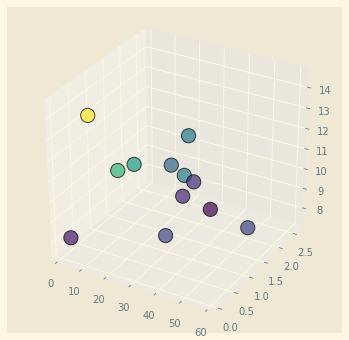

In [ ]:
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

# Статистический анализ

In [ ]:
prize1

,Total_Prize,Year_End,Num_Commands,meanPrize
Tournament_Name,,,,
2013 WPC ACE Dota 2 League,248024,2014,10,24802.400000
ASUS Open 2012 Finals,15000,2012,12,1250.000000
Alienware Cup 2013 - Season 1,60000,2013,10,6000.000000
China Dota2 Supermajor,1500000,2018,16,93750.000000
DOTA Summit 7,100000,2017,8,12500.000000
...,...,...,...,...
i-League Season 1,311655,2014,8,38956.875000
i-League Season 2,129307,2015,8,16163.375000
i-League Season 3,428369,2015,8,53546.125000


In [ ]:
prize1.columns

Index(['Total_Prize', 'Year_End', 'Num_Commands', 'meanPrize'], dtype='object')

In [ ]:
# Mann-Whitney U test

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(prize1['Total_Prize'], prize2['Total_Prize'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=35914.000, p=0.000
Different distribution (reject H0)


In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(prize1['Total_Prize'], prize2['Total_Prize'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=41.500, p=0.000
Different distributions (reject H0)


In [ ]:
prize1['Year_End'].values

array([2014, 2012, 2013, 2018, 2017, 2015, 2017, 2018, 2014, 2014, 2014,
       2014, 2015, 2014, 2015, 2013, 2014, 2015, 2016, 2017, 2016, 2011,
       2012, 2013, 2012, 2013, 2014, 2019, 2020, 2014, 2015, 2017, 2020,
       2016, 2017, 2019, 2020, 2018, 2018, 2021, 2014, 2015, 2016, 2017,
       2020, 2017, 2018, 2020, 2022, 2016, 2014, 2015, 2022, 2021, 2011,
       2012, 2013, 2015, 2014, 2014, 2012, 2013, 2014, 2013, 2022, 2017,
       2018, 2015, 2014, 2018, 2019, 2019, 2013, 2015, 2016, 2017, 2014,
       2015, 2016, 2015, 2016, 2013, 2014, 2013, 2013, 2014, 2016, 2021,
       2020, 2019, 2020, 2021, 2022, 2012, 2012, 2013, 2013, 2013, 2013,
       2013, 2014, 2013, 2022, 2012, 2014, 2015, 2015, 2012, 2012, 2012,
       2013, 2013, 2013, 2014, 2014, 2016, 2017, 2016, 2016, 2017, 2013,
       2012, 2016, 2018, 2019, 2012, 2012, 2013, 2013, 2015, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2017, 2018,
       2016, 2017, 2012, 2012, 2013, 2013, 2013, 20

In [ ]:

import statsmodels.formula.api as smf

model = smf.ols('Num_Commands ~ Year_End', data=prize1)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Num_Commands   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.403
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0373
Time:                        13:26:59   Log-Likelihood:                -534.64
No. Observations:                 177   AIC:                             1073.
Df Residuals:                     175   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -567.8024    276.223     -2.056      0.0

In [ ]:


model = smf.ols('meanPrize ~ Num_Commands', data=prize1)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              meanPrize   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.63
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000488
Time:                        13:26:59   Log-Likelihood:                -2473.9
No. Observations:                 177   AIC:                             4952.
Df Residuals:                     175   BIC:                             4958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.555e+04   5.48e+04     -1.561   

# География

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import pandas as pd
from geopandas.tools import geocode
 

In [ ]:
#address we need to locate
loc = 'Kuala Lumpur, Malaysia'
 
#finding the location
location = geocode(loc, provider="nominatim" , user_agent = 'my_request')
 
point = location.geometry.iloc[0]
print('Name: '+ loc )
print('complete address: '+ location.address.iloc[0])
print('longitude: {} '.format(point.x))
print('latitude: {} '.format(point.y))

Name: Kuala Lumpur, Malaysia
complete address: Kuala Lumpur, Malaysia
longitude: 101.6942371 
latitude: 3.1516964 


In [ ]:
tur = []
for loc in t1['Location']:
  if loc not in('Europe','World', 'China', 'Europe & CIS'):
    tur.append(loc)
print(len(tur))

152


In [ ]:
df = pd.DataFrame({'tur' : tur})
df.head(15)

,tur
0,Singapore
1,"Genting Highlands, Malaysia"
2,"Arlington, United States"
3,"Riyadh, Saudi Arabia"
4,"Stockholm, Sweden"
5,"Dubai, United Arab Emirates"
6,"Bucharest, Romania"
7,Europe & CIS
8,"Kyiv, Ukraine"
9,Singapore


In [ ]:
df['tur'].unique()

array(['Singapore', 'Genting Highlands, Malaysia',
       'Arlington, United States', 'Riyadh, Saudi Arabia',
       'Stockholm, Sweden', 'Dubai, United Arab Emirates',
       'Bucharest, Romania', 'Europe\xa0&\xa0CIS', 'Kyiv, Ukraine',
       'Moscow, Russia', 'Los Angeles, USA', 'Leipzig, Germany',
       'Chengdu, China', 'Shanghai, China', 'Paris, France',
       'Chongqing, China', 'Kuala Lumpur, Malaysia', 'Vancouver, Canada',
       'Birmingham, United Kingdom', 'Changsha, China', 'Haikou, China',
       'Katowice, Poland', 'Ciudad de Victoria, Philippines',
       'Jönköping, Sweden', 'Hamburg, Germany', 'Seattle, United States',
       'Wuhan, China', 'Shenzhen, China', 'Los Angeles, United States',
       'Taipei, Taiwan', 'Manila, Philippines', 'Split, Croatia',
       'Changzhou, China', 'Yinchuan, China', 'Boston, United States',
       'Montreal, Canada', 'Xiamen, China', 'Frankfurt, Germany',
       'Wuxi, China', 'Minsk, Belarus',
       'Moscow, Russia\xa0&\xa0Vilnius,

In [ ]:
df.loc[73] = 'Moscow, Russia'

In [ ]:
df.loc[152] = 'Vilnius, Lithuania'

In [ ]:
df.loc[136] = 'Kuala Lumpur, Malaysia'

In [ ]:
df1=df.drop(df.index[[7,10, 11, 12]])

In [ ]:
df1.loc[1:15]

,tur
1,"Genting Highlands, Malaysia"
2,"Arlington, United States"
3,"Riyadh, Saudi Arabia"
4,"Stockholm, Sweden"
5,"Dubai, United Arab Emirates"
6,"Bucharest, Romania"
8,"Kyiv, Ukraine"
9,Singapore
13,Singapore
14,"Moscow, Russia"


In [ ]:
df1['tur'].unique()

array(['Singapore', 'Genting Highlands, Malaysia',
       'Arlington, United States', 'Riyadh, Saudi Arabia',
       'Stockholm, Sweden', 'Dubai, United Arab Emirates',
       'Bucharest, Romania', 'Kyiv, Ukraine', 'Moscow, Russia',
       'Los Angeles, USA', 'Leipzig, Germany', 'Chengdu, China',
       'Shanghai, China', 'Paris, France', 'Chongqing, China',
       'Kuala Lumpur, Malaysia', 'Vancouver, Canada',
       'Birmingham, United Kingdom', 'Changsha, China', 'Haikou, China',
       'Katowice, Poland', 'Ciudad de Victoria, Philippines',
       'Jönköping, Sweden', 'Hamburg, Germany', 'Seattle, United States',
       'Wuhan, China', 'Shenzhen, China', 'Los Angeles, United States',
       'Taipei, Taiwan', 'Manila, Philippines', 'Split, Croatia',
       'Changzhou, China', 'Yinchuan, China', 'Boston, United States',
       'Montreal, Canada', 'Xiamen, China', 'Frankfurt, Germany',
       'Wuxi, China', 'Minsk, Belarus', 'New Orleans, United States',
       'New York, United States

In [ ]:

 
#function to unzip latitude and longitude from GeoDataFrame
def custom_geocoder(address):
    
    dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request')
    point = dataframe.geometry.iloc[0]
    
    print('Latitude  ', point.y, 'Longitude  ', point.x)
    return pd.Series({'Latitude': point.y, 'Longitude': point.x})
 


In [ ]:
#Applying function to the dataframe
df[['latitude' , 'longitude']]= df.tur.apply( lambda x: custom_geocoder(x))
 
df

Latitude   1.357107 Longitude   103.8194992
Latitude   3.4237725 Longitude   101.7935591
Latitude   32.7355816 Longitude   -97.1071186
Latitude   24.638916 Longitude   46.7160104
Latitude   59.3251172 Longitude   18.0710935
Latitude   25.074282349999997 Longitude   55.18853865430702
Latitude   44.4361414 Longitude   26.1027202
Latitude   49.724028149999995 Longitude   1.431519066163563
Latitude   50.4500336 Longitude   30.5241361
Latitude   1.357107 Longitude   103.8194992
Latitude   49.724028149999995 Longitude   1.431519066163563
Latitude   49.724028149999995 Longitude   1.431519066163563
Latitude   49.724028149999995 Longitude   1.431519066163563
Latitude   1.357107 Longitude   103.8194992
Latitude   55.7504461 Longitude   37.6174943
Latitude   34.0536909 Longitude   -118.242766
Latitude   51.3406321 Longitude   12.3747329
Latitude   1.357107 Longitude   103.8194992
Latitude   30.6598628 Longitude   104.0633717
Latitude   31.2322758 Longitude   121.4692071
Latitude   55.7504461 Long

,tur,latitude,longitude
0,Singapore,1.357107,103.819499
1,"Genting Highlands, Malaysia",3.423773,101.793559
2,"Arlington, United States",32.735582,-97.107119
3,"Riyadh, Saudi Arabia",24.638916,46.716010
4,"Stockholm, Sweden",59.325117,18.071093
...,...,...,...
148,"Kyiv, Ukraine",50.450034,30.524136
149,"Kiev, Ukraine",50.450034,30.524136
150,"Paris, France",48.858890,2.320041
151,"Cologne, Germany",50.938361,6.959974


In [ ]:
# Make sure you run the above code first to plot the results
mapit = folium.Map( location=[0, 0], zoom_start=1 )
 
for lat , lon in zip(df.latitude , df.longitude):
    folium.Marker( location=[ lat,lon ], fill_color='#43d9de', radius=8 ).add_to( mapit )
 
     
mapit